In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
#sys.path.insert(0,'/usr/local/share/qgis/python')
#sys.path = ['C:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/./python', 'C:/Users/vitor/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', 'C:/Users/vitor/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python/plugins', 'C:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/./python/plugins', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\Scripts', 'C:\\Program Files\\QGIS 3.10\\bin\\python37.zip', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\DLLs', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib', 'C:\\Program Files\\QGIS 3.10\\bin', 'C:\\Users\\vitor\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages\\win32', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages\\win32\\lib', 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages\\Pythonwin', 'C:/Users/vitor/AppData/Roaming/QGIS/QGIS3\\profiles\\default/python', '.']
#os.environ['PATH'] = 'C:\\PROGRA~1\\QGIS3~1.10\\apps\\qgis-ltr\\bin;C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37;C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\Scripts;C:\\PROGRA~1\\QGIS3~1.10\\apps\\qt5\\bin;C:\\PROGRA~1\\QGIS3~1.10\\bin;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\system32\\WBem;C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages\\pywin32_system32;C:\\PROGRA~1\\QGIS3~1.10\\apps\\Python37\\lib\\site-packages\\numpy\\.libs'

from qgis.core import *
#QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing
import qgis.utils
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

#QgsApplication.setPrefixPath(r'C:/PROGRA~1/QGIS3~1.10\apps\qgis', True)
qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

sys.path.append(r'C:/PROGRA~1/QGIS3~1.10\apps\qgis-ltr\python\plugins')


Application state:
QGIS_PREFIX_PATH env var:		c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr
Prefix:		c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr
Plugin Path:		c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/plugins
Package Data Path:	c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/.
Active Theme Name:	
Active Theme Path:	c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/./svg/
		C:/Users/vitor/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	c:/PROGRA~1/QGIS3~1.10/apps/qgis-ltr/./resources/qgis.db
Auth DB Path:	C:/Users/vitor/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [ ]:
covid_gpkg = r"C:\Users\vitor\Documents\MIEI\Tecnologias e Aplicações\cartografia\covid-pt-2020-04-20.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))
concelho = QgsProject.instance().mapLayersByName('concelho')[0]

In [ ]:
xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()

options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
''''''        
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()


In [ ]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [ ]:
uri = "file:///C:/query.csv?encoding=%s&delimiter=%s&xField=%s&yField=%s&crs=%s" % ("UTF-8",",", "longitude", "latitude","epsg:4326")
print(uri)
#Make a vector layer
eq_layer=QgsVectorLayer(uri,"eq-data","delimitedtext")

#Check if layer is valid
if not eq_layer.isValid():
    print ("Layer not loaded")


In [11]:
uri = r"file:///time_series_covid19_confirmed_global.csv?delimiter=,&xField=Long&yField=Lat"
print(uri)
confirmed = QgsVectorLayer(uri, "confirmed", "delimitedtext")
if not confirmed.isValid():
    print("Layer failed to load!")
confirmed.isValid()

file:///time_series_covid19_confirmed_global.csv?delimiter=,&xField=Long&yField=Lat


True

In [12]:
countries = r"C:/Users/vitor/Documents/MIEI/Tecnologias e Aplicações/cartografia/ne_10m_admin_0_countries.shp"
countries = QgsVectorLayer(countries, "countries", "ogr")
if not countries.isValid():
    print("Layer failed to load!")

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

In [53]:
xt = countries.extent()
# print(xt)
width  = 1200
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()

options.setLayers([res['OUTPUT']])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
''''''        
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()


Gerar mapa com 1200 por 578


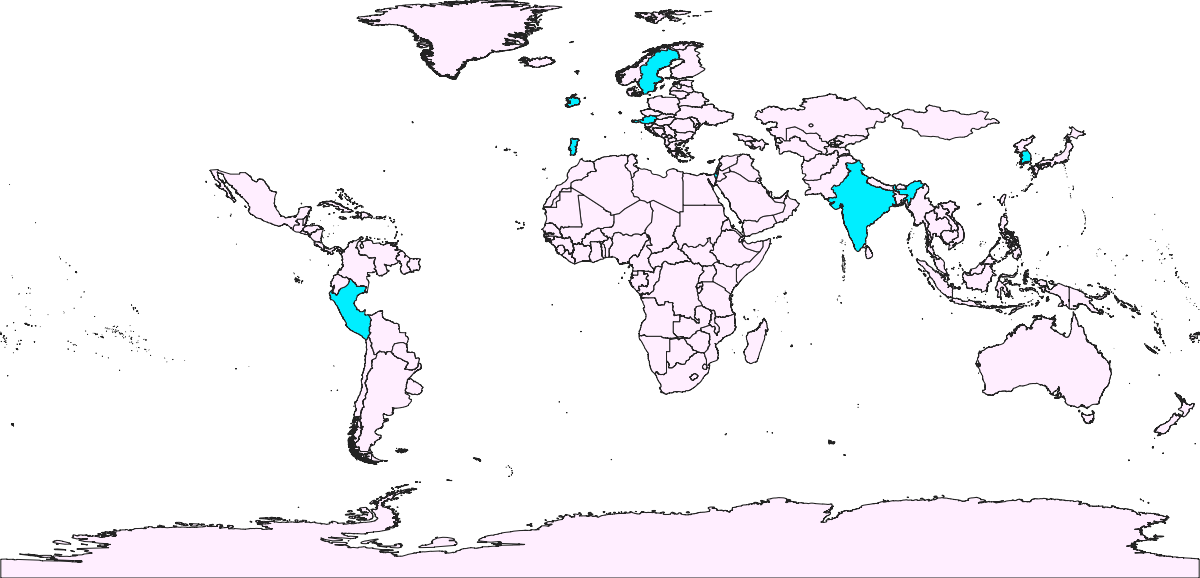

In [54]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [ ]:
from qgis.core import *
from qgis import *
 
Input_Table = r'C:/query.csv' # set the filepath for the input CSV
lon_field = 'longitude' # set the name for the field containing the longitude
lat_field = 'latitude' # set the name for the field containing the latitude
crs = 4326 # set the crs as needed
Output_Layer = 'output.shp' # set the filepath for the output shapefile
 
spatRef = QgsCoordinateReferenceSystem(crs, QgsCoordinateReferenceSystem.EpsgCrsId)
 
inp_tab = QgsVectorLayer(Input_Table, 'Input_Table', 'ogr')
prov = inp_tab.dataProvider()
fields = inp_tab.pendingFields()
outLayer = QgsVectorFileWriter(Output_Layer, None, fields, QGis.WKBPoint, spatRef)
 
pt = QgsPoint()
outFeature = QgsFeature()
 
for feat in inp_tab.getFeatures():
    attrs = feat.attributes()
    pt.setX(float(feat[lon_field]))
    pt.setY(float(feat[lat_field]))
    outFeature.setAttributes(attrs)
    outFeature.setGeometry(QgsGeometry.fromPoint(pt))
    outLayer.addFeature(outFeature)
del outLayer

In [ ]:
QgsProject().instance().addMapLayers([confirmed,countries])



In [ ]:
lien = QgsVectorLayerJoinInfo()
lien.setTargetFieldName('NAME')
lien.setJoinFieldName(r'Country/Region')
lien.setJoinLayerId(confirmed.id())
lien.setUsingMemoryCache(True)
lien.setJoinLayer(confirmed)
countries.addJoin(lien)

In [ ]:

for field in countries.fields():
    print(field.name(), field.typeName())

In [ ]:
graduated_renderer = QgsGraduatedSymbolRenderer()
# Add a few categories
graduated_renderer.addClassRange(QgsRendererRange(QgsClassificationRange('class 0-100', 0, 100), QgsMarkerSymbol()))
graduated_renderer.addClassRange(QgsRendererRange(QgsClassificationRange('class 101-200', 101, 200), QgsMarkerSymbol()))

for ran in graduated_renderer.ranges():
    print("{} - {}: {} {}".format(
        ran.lowerValue(),
        ran.upperValue(),
        ran.label(),
        ran.symbol()
      ))

In [ ]:


from qgis.PyQt import QtGui


myTargetField = r'confirmed_4/14/20'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 0.0
myMax = 10000
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffeeff')
mySymbol1 = QgsSymbol.defaultSymbol(countries.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)
#now make another symbol and range...
myMin = 10000.1
myMax = 20000
myLabel = 'Group 2'
myColour = QtGui.QColor('#00eeff')
mySymbol2 = QgsSymbol.defaultSymbol(
     countries.geometryType())

mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)
myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

countries.setRenderer(myRenderer)

In [ ]:
for ran in myRenderer.ranges():
    print("{} - {}: {} {}".format(
        ran.lowerValue(),
        ran.upperValue(),
        ran.label(),
        ran.symbol()
      ))

In [ ]:
for i in range(0,100):
    print(str(i)+": "+countries.attributeDisplayName(i))

In [ ]:
countries.startEditing()
countries.deleteAttributes(range(18,94))
countries.commitChanges()

In [ ]:
a=list()

In [ ]:
a

In [ ]:
tenta = QgsVectorLayer(countries)

In [ ]:
QgsAggregateCalculator.aggregate()

In [ ]:
countries.aggregate(aggregate=1,fieldOrExpression='LEVEL')

In [ ]:
help(QgsAggregateCalculator.Aggregate)

In [ ]:


from processing.core.Processing import Processing
Processing.initialize()
from processing.tools import *

layer1 = "path/to/point_shapefile.shp"
layer2 = "path/to/polygon_shapefile.shp"
result = "path/to/output_shapefile.shp"

general.runalg("qgis:joinattributesbylocation", countries, confirmed, u'intersects', 0, 0, '', 1, result)

In [ ]:
processing.alglist()

In [3]:
import processing
from qgis.analysis import QgsNativeAlgorithms

from processing.core.Processing import Processing

Processing.initialize()
QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "->", alg.displayName())

gdal:aspect -> Aspect
gdal:assignprojection -> Assign projection
gdal:buffervectors -> Buffer vectors
gdal:buildvirtualraster -> Build virtual raster
gdal:cliprasterbyextent -> Clip raster by extent
gdal:cliprasterbymasklayer -> Clip raster by mask layer
gdal:clipvectorbyextent -> Clip vector by extent
gdal:clipvectorbypolygon -> Clip vector by mask layer
gdal:colorrelief -> Color relief
gdal:contour -> Contour
gdal:convertformat -> Convert format
gdal:dissolve -> Dissolve
gdal:executesql -> Execute SQL
gdal:extractprojection -> Extract projection
gdal:fillnodata -> Fill nodata
gdal:gdal2tiles -> gdal2tiles
gdal:gdal2xyz -> gdal2xyz
gdal:gdalinfo -> Raster information
gdal:gridaverage -> Grid (Moving average)
gdal:griddatametrics -> Grid (Data metrics)
gdal:gridinversedistance -> Grid (Inverse distance to a power)
gdal:gridinversedistancenearestneighbor -> Grid (IDW with nearest neighbor searching)
gdal:gridlinear -> Grid (Linear)
gdal:gridnearestneighbor -> Grid (Nearest neighbor)
gda

saga:changedateformat -> Change date format
saga:changedetection -> Change detection
saga:changetimeformat -> Change time format
saga:channelnetwork -> Channel network
saga:channelnetworkanddrainagebasins -> Channel network and drainage basins
saga:clippointswithpolygons -> Clip points with polygons
saga:cliprasterwithpolygon -> Clip raster with polygon
saga:closegaps -> Close gaps
saga:closegapswithspline -> Close gaps with spline
saga:closegapswithstepwiseresampling -> Close gaps with stepwise resampling
saga:closeonecellgaps -> Close one cell gaps
saga:clusteranalysis -> Cluster analysis
saga:clusteranalysisshapes -> Cluster analysis (shapes)
saga:concentration -> Concentration
saga:confusionmatrixpolygonsgrid -> Confusion matrix (polygons / grid)
saga:confusionmatrixtwogrids -> Confusion matrix (two grids)
saga:connectivityanalysis -> Connectivity analysis
saga:constantgrid -> Constant grid
saga:contourlines -> Contour lines
saga:convergenceindex -> Convergence index
saga:convergen

In [ ]:
processing.algorithmHelp("saga:rasterproduct")

In [ ]:
for alg in QgsApplication.processingRegistry().algorithms():
        print("{}:{} --> {}".format(alg, alg.name(), alg.displayName()))

In [ ]:
help(QgsApplication.processingRegistry().addProvider)

In [4]:
processing.algorithmHelp("qgis:joinbynearest")

Join attributes by nearest (native:joinbynearest)

Joins a layer to another layer, using the closest features (nearest neighbors).

This algorithm takes an input vector layer and creates a new vector layer that is an extended version of the input one, with additional attributes in its attribute table.

The additional attributes and their values are taken from a second vector layer, where features are joined by finding the closest features from each layer. By default only the single nearest feature is joined,but optionally the join can use the n-nearest neighboring features instead. If multiple features are found with identical distances these will all be returned (even if the total number of features exceeds the specified maximum feature count).

If a maximum distance is specified, then only features which are closer than this distance will be matched.

The output features will contain the selected attributes from the nearest feature, along with new attributes for the distance to the n

In [29]:
params = { 
    'INPUT' : countries,
    'INPUT_2' : confirmed, 
    'FIELDS_TO_COPY' : '',
    'DISCARD_NONMATCHING' : False,
    'PREFIX' : '',
    'NEIGHBORS' : 1,
    'MAX_DISTANCE' : 99999999,
    'OUTPUT' : 'memory:'
}

In [30]:
feedback = QgsProcessingFeedback()

res = processing.run('qgis:joinbynearest', params,feedback=feedback)

In [32]:
vamos = res['OUTPUT']

In [25]:
res


{'JOINED_COUNT': 255,
 'OUTPUT': <QgsMapLayer: 'output' (memory)>,
 'UNJOINABLE_COUNT': 0}

In [ ]:
vamos = res['OUTPUT']
camos = QgsVectorLayer(countries, "countries", "ogr")
if not countries.isValid():
    print("Layer failed to load!")

In [36]:
processing.algorithmHelp("qgis:aggregate")

Aggregate (qgis:aggregate)

This algorithm take a vector or table layer and aggregate features based on a group by expression. Features for which group by expression return the same value are grouped together.
It is possible to group all source features together using constant value in group by parameter, example: NULL.
It is also possible to group features using multiple fields using Array function, example: Array("Field1", "Field2").
Geometries (if present) are combined into one multipart geometry for each group.
Output attributes are computed depending on each given aggregate definition.



----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

GROUP_BY: Group by expression (NULL to group all features)

	Parameter type:	QgsProcessingParameterExpression

	Ac

In [43]:
params = { 
    'INPUT' : res['OUTPUT'],
    'GROUP_BY' : 'NAME', 
    'AGGREGATES':[
            {'aggregate': 'first_value', 'delimiter': ',', 'input': '"NAME"', 'length': 0, 'name': 'NAME', 'precision': 0, 'type': 10}, 
            {'aggregate': 'sum', 'delimiter': ',', 'input': '"4/15/20"', 'length': 0, 'name': '4/15/20', 'precision': 0, 'type': 2},],
    'OUTPUT' : 'memory:'
}

In [44]:
feedback = QgsProcessingFeedback()

res = processing.run('qgis:aggregate', params,feedback=feedback)

In [52]:


from qgis.PyQt import QtGui


myTargetField = r'4/15/20'
myRangeList = []
myOpacity = 1
# Make our first symbol and range...
myMin = 0.0
myMax = 10000
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffeeff')
mySymbol1 = QgsSymbol.defaultSymbol(res['OUTPUT'].geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)
#now make another symbol and range...
myMin = 10000.1
myMax = 20000
myLabel = 'Group 2'
myColour = QtGui.QColor('#00eeff')
mySymbol2 = QgsSymbol.defaultSymbol(
     res['OUTPUT'].geometryType())

mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)
myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

res['OUTPUT'].setRenderer(myRenderer)